# Profiling function with pyprof2calltree

In [ ]:
!pip install pyprof2calltree

In [1]:
from functools import wraps
import io
from line_profiler import LineProfiler
import pyprof2calltree
import time
import cProfile

In [2]:
def profiling():
    def _profiling(f):
        @wraps(f)
        def __profiling(*args, **kwargs):
            prof = LineProfiler()
            try:
                profileFileName = f.__name__ + time.strftime('%Y%m%d_%H%M%S') 
                profile = cProfile.Profile()
                profile.enable()
                prof(f)(*args, **kwargs)
                pyprof2calltree.convert(profile.getstats(), profileFileName +'.kgrind')
                return 
            finally:
                stdout_trap = io.StringIO()
                prof.print_stats(stdout_trap)
                output = stdout_trap.getvalue()
                output = output.rstrip()
                with open(profileFileName + '.txt', 'w+') as file:
                    file.write(output)
        return __profiling
    return _profiling

In [31]:
@profiling()
def longestPalindrome(s):
    """
    :type s: str
    :rtype: str
    """
    dp = [[0 for _ in range(len(s))] for _ in range(len(s))]
    maxLength, result = 1, ""
    for index in range(len(s)):
        dp[index][index] = 1
        result = s[index]

    length = 2

    while length <= len(s):
        index_i = 0
        while index_i < len(s) - length + 1:
            index_j = index_i + length -1

            if length == 2 and s[index_i] == s[index_j]:
                dp[index_i][index_j] = 1
                maxLength = max(maxLength, 2)
                result = s[index_i:index_j+1]
            elif s[index_i] == s[index_j] and dp[index_i+1][index_j-1]:
                dp[index_i][index_j] = 1
                if length > maxLength:
                    maxLength = length
                    result = s[index_i:index_j+1]

            index_i += 1
        length += 1

    return result

Qcachegrind / Kcachegrind

In [32]:
longestPalindrome("abcccccdd")

# Download KCacheGrind wimndows built there:

https://sourceforge.net/projects/qcachegrindwin/files/latest/download  

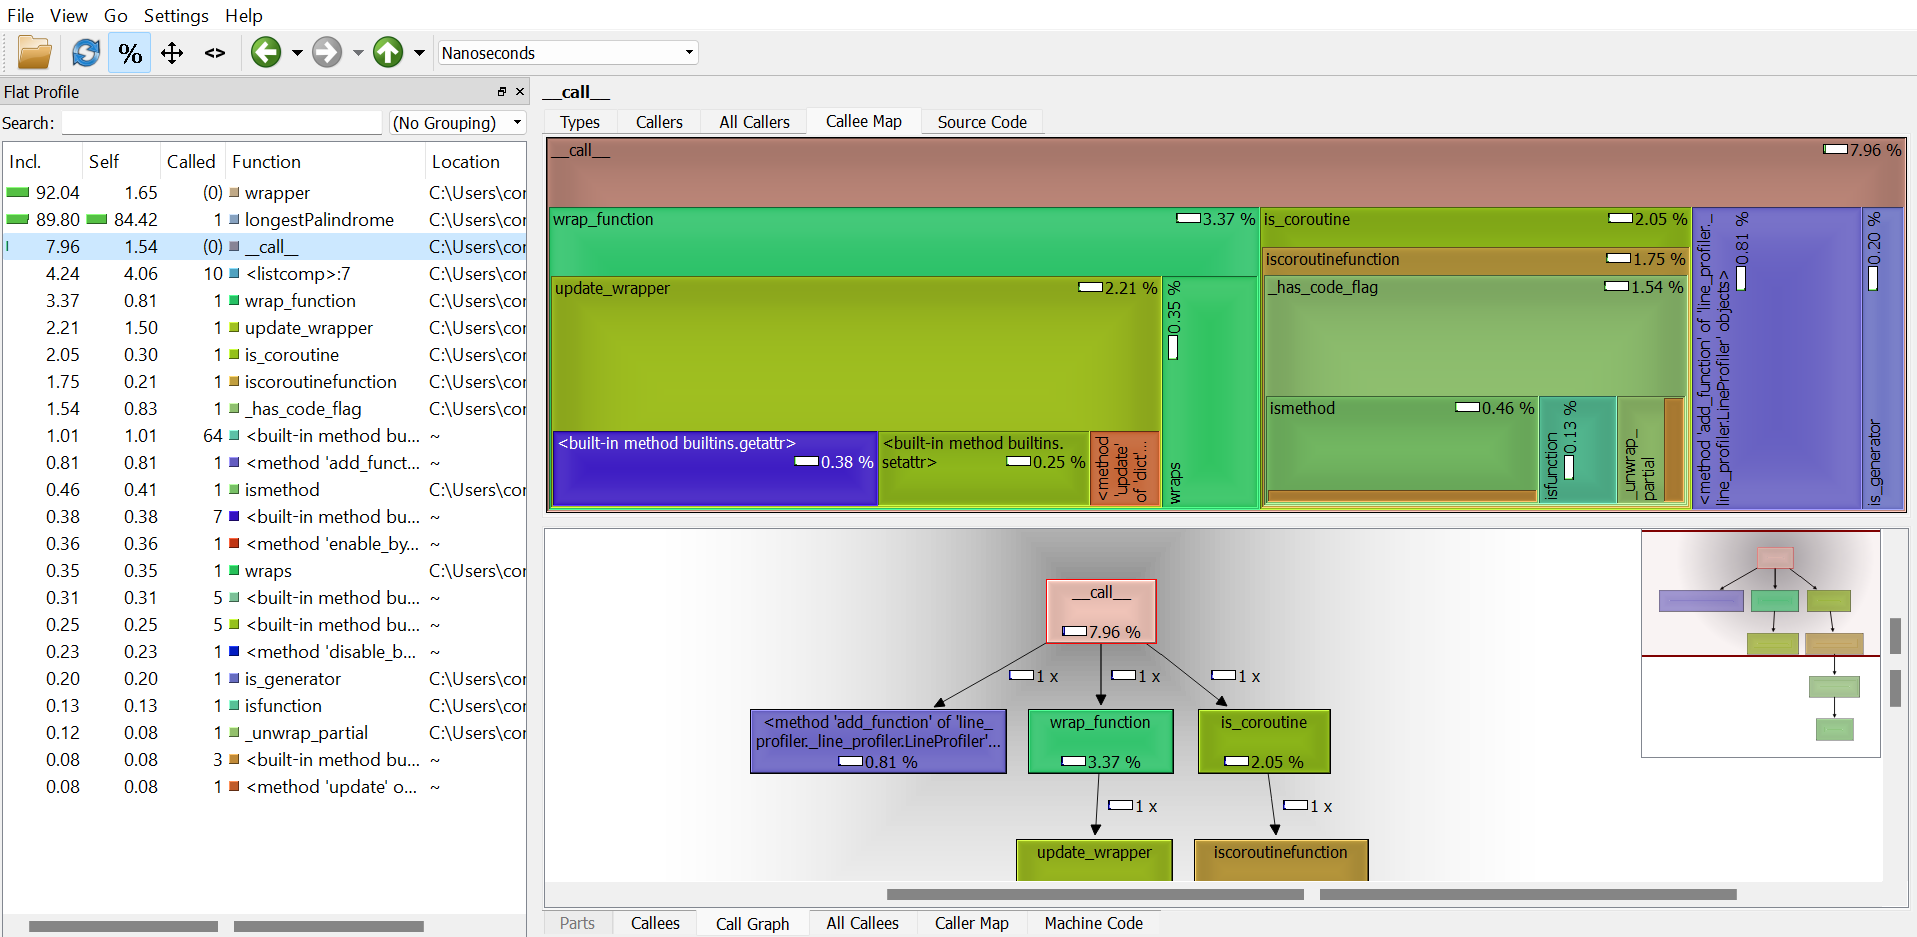